In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
%matplotlib inline

C:\Users\lenovo1\Anaconda2\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lenovo1\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Users\lenovo1\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lenovo1\Anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.

In [2]:
col_names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
train = pd.read_csv('Train.txt', sep=",",header=None,names=col_names)
test= pd.read_csv('Test.txt', sep=",",header=None,names=col_names)

In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [6]:
train['attack']=train['attack'].astype('category')
test['attack']=test['attack'].astype('category')

In [7]:
train['attack'].cat.categories

Index([u'back', u'buffer_overflow', u'ftp_write', u'guess_passwd', u'imap',
       u'ipsweep', u'land', u'loadmodule', u'multihop', u'neptune', u'nmap',
       u'normal', u'perl', u'phf', u'pod', u'portsweep', u'rootkit', u'satan',
       u'smurf', u'spy', u'teardrop', u'warezclient', u'warezmaster'],
      dtype='object')

In [8]:
test['attack'].cat.categories

Index([u'apache2', u'back', u'buffer_overflow', u'ftp_write', u'guess_passwd',
       u'httptunnel', u'imap', u'ipsweep', u'land', u'loadmodule', u'mailbomb',
       u'mscan', u'multihop', u'named', u'neptune', u'nmap', u'normal',
       u'perl', u'phf', u'pod', u'portsweep', u'processtable', u'ps',
       u'rootkit', u'saint', u'satan', u'sendmail', u'smurf', u'snmpgetattack',
       u'snmpguess', u'sqlattack', u'teardrop', u'udpstorm', u'warezmaster',
       u'worm', u'xlock', u'xsnoop', u'xterm'],
      dtype='object')

In [9]:
dos=['back','land','neptune','pod','smurf','teardrop','apache2','processtable','teardrop','udpstorm','worm','mailbomb']
probe=['satan','ipsweep','nmap','portsweep','mscan','saint']
r2l=['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','httptunnel','named','sendmail','snmpgetattack','snmpguess','xlock','xsnoop']
utr=['buffer_overflow','loadmodule','rootkit','perl','ps','rootkit','sqlattack','xterm']
normal=['normal']

In [10]:
def func1(x):
    if x in dos:
        return "DOS"
    elif x in probe:
        return "Probe"
    elif x in r2l:
        return "R2L"
    elif x in utr:
        return "UTR"
    elif x in normal:
        return "normal"
    else:
        return np.nan

In [11]:
train['attack_tr'] = train['attack'].apply(func1)
test['attack_tr'] = test['attack'].apply(func1)

In [12]:
train.drop(columns=['attack'], axis=1, inplace = True)
test.drop(columns=['attack'], axis=1, inplace = True)

In [13]:
train['attack_tr'].head()

0    normal
1    normal
2       DOS
3    normal
4    normal
Name: attack_tr, dtype: object

In [14]:
train['attack_tr'].isnull().sum()

0

In [15]:
test['attack_tr'].head()

0       DOS
1       DOS
2    normal
3     Probe
4     Probe
Name: attack_tr, dtype: object

In [16]:
test['attack_tr'].isnull().sum()

0

In [21]:
pandas_profiling.ProfileReport(train)

Number of variables,40
Number of observations,125973
Total Missing (%),0.0%
Total size in memory,33.4 MiB
Average record size in memory,278.0 B
Numeric,24
Categorical,3
Boolean,6
Date,0
Text (Unique),0
Rejected,7


In [22]:
pandas_profiling.ProfileReport(test)

Number of variables,40
Number of observations,22544
Total Missing (%),0.0%
Total size in memory,6.0 MiB
Average record size in memory,278.0 B
Numeric,24
Categorical,3
Boolean,6
Date,0
Text (Unique),0
Rejected,7


In [17]:
train['flag'] = train['flag'].astype(object)
test['flag'] = test['flag'].astype(object)
train['is_guest_login']=train['is_guest_login'].astype(bool)
test['is_guest_login']=test['is_guest_login'].astype(bool)
train['is_host_login']=train['is_host_login'].astype(bool)
test['is_host_login']=test['is_host_login'].astype(bool)
train['land']=train['land'].astype(bool)
test['land']=test['land'].astype(bool)
train['logged_in']=train['logged_in'].astype(bool)
test['logged_in']=test['logged_in'].astype(bool)
train['root_shell']=train['root_shell'].astype(bool)
test['root_shell']=test['root_shell'].astype(bool)
train['num_shells']=train['num_shells'].astype(bool)
test['num_shells']=test['num_shells'].astype(bool)
train['protocol_type']=train['protocol_type'].astype(object)
test['protocol_type']=test['protocol_type'].astype(object)
train['urgent']=train['urgent'].astype(object)
test['urgent']=test['urgent'].astype(object)
train['wrong_fragment']=train['wrong_fragment'].astype(object)
test['wrong_fragment']=test['wrong_fragment'].astype(object)

In [18]:
train['service'].value_counts()

http           40338
private        21853
domain_u        9043
smtp            7313
ftp_data        6860
eco_i           4586
other           4359
ecr_i           3077
telnet          2353
finger          1767
ftp             1754
auth             955
Z39_50           862
uucp             780
courier          734
bgp              710
whois            693
uucp_path        689
iso_tsap         687
time             654
imap4            647
nnsp             630
vmnet            617
urp_i            602
domain           569
ctf              563
csnet_ns         545
supdup           544
discard          538
http_443         530
               ...  
klogin           433
login            429
ldap             410
netbios_dgm      405
sunrpc           381
netbios_ssn      362
netstat          360
netbios_ns       347
ssh              311
kshell           299
nntp             296
pop_3            264
sql_net          245
IRC              187
ntp_u            168
rje               86
remote_job   

In [19]:
train.drop(columns=['service'],axis=1,inplace=True)
test.drop(columns=['service'],axis=1,inplace=True)

In [20]:
train.drop(columns=['su_attempted','num_outbound_cmds'],axis=1,inplace=True)
test.drop(columns=['su_attempted','num_outbound_cmds'],axis=1,inplace=True)

In [21]:
train.drop(columns=['wrong_fragment'],inplace=True,axis=1)
test.drop(columns=['wrong_fragment'],inplace=True,axis=1)

In [22]:
num_list_tr=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_list_tr=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object','bool']]
print num_list_tr
print cat_list_tr

['num_access_files', 'src_bytes', 'srv_count', 'last_flag', 'rerror_rate', 'dst_host_same_srv_rate', 'duration', 'srv_rerror_rate', 'srv_serror_rate', 'num_file_creations', 'serror_rate', 'num_compromised', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate', 'diff_srv_rate', 'hot', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'srv_diff_host_rate', 'dst_host_same_src_port_rate', 'dst_host_count', 'count', 'same_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_rerror_rate', 'num_root', 'num_failed_logins', 'dst_host_serror_rate']
['urgent', 'is_host_login', 'is_guest_login', 'logged_in', 'num_shells', 'attack_tr', 'root_shell', 'flag', 'protocol_type', 'land']


In [23]:
num_list_ts=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_list_ts=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object','bool']]
print num_list_ts
print cat_list_ts

['num_access_files', 'src_bytes', 'srv_count', 'last_flag', 'rerror_rate', 'dst_host_same_srv_rate', 'duration', 'srv_rerror_rate', 'srv_serror_rate', 'num_file_creations', 'serror_rate', 'num_compromised', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate', 'diff_srv_rate', 'hot', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'srv_diff_host_rate', 'dst_host_same_src_port_rate', 'dst_host_count', 'count', 'same_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_rerror_rate', 'num_root', 'num_failed_logins', 'dst_host_serror_rate']
['urgent', 'is_host_login', 'is_guest_login', 'logged_in', 'num_shells', 'attack_tr', 'root_shell', 'flag', 'protocol_type', 'land']


In [24]:
train['class_new']=train['attack_tr'].map({'normal':0,'DOS':1,'Probe':2,'R2L':3,'UTR':4})
test['class_new']=test['attack_tr'].map({'normal':0,'DOS':1,'Probe':2,'R2L':3,'UTR':4})

In [25]:
train['class_new']

0         0
1         0
2         1
3         0
4         0
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        0
13        3
14        1
15        1
16        0
17        2
18        0
19        0
20        1
21        1
22        0
23        0
24        1
25        0
26        1
27        0
28        0
29        0
         ..
125943    0
125944    0
125945    0
125946    1
125947    2
125948    1
125949    0
125950    1
125951    0
125952    0
125953    1
125954    0
125955    0
125956    0
125957    0
125958    1
125959    0
125960    0
125961    0
125962    0
125963    0
125964    1
125965    0
125966    1
125967    0
125968    1
125969    0
125970    0
125971    1
125972    0
Name: class_new, Length: 125973, dtype: int64

In [26]:
cat_list_tr.append('class_new')
cat_list_ts.append('class_new')

In [27]:
train.drop(columns=['attack_tr'], axis=1, inplace = True)
test.drop(columns=['attack_tr'], axis=1, inplace = True)

In [28]:
cat_list_tr.remove('attack_tr')
cat_list_ts.remove('attack_tr')

In [29]:
train.isnull().sum()

duration                       0
protocol_type                  0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_d

In [30]:
test.isnull().sum()

duration                       0
protocol_type                  0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_d

In [31]:
sum(train.duplicated())

3031

In [32]:
sum(test.duplicated())

81

In [33]:
train.drop_duplicates(keep='last',inplace=True)
test.drop_duplicates(keep='last',inplace=True)

In [34]:
train_num=train[num_list_tr]
train_cat=train[cat_list_tr]
test_num=test[num_list_ts]
test_cat=test[cat_list_ts]

In [35]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary1=train_num.apply(lambda x: var_summary(x)).T
num_summary1

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
num_access_files,122942.0,0.0,5.160000e+02,0.004197,0.00,1.005849e-01,1.011733e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.000000e+00
src_bytes,122942.0,0.0,5.740179e+09,46690.140180,45.00,5.942250e+06,3.531034e+13,0.0,0.0,0.00,0.00,0.00,45.00,282.00,879.00,1489.00,54540.00,1.379964e+09
srv_count,122942.0,0.0,3.459581e+06,28.139944,7.00,7.346935e+01,5.397745e+03,0.0,1.0,1.00,1.00,2.00,7.00,18.00,41.00,159.00,508.00,5.110000e+02
last_flag,122942.0,0.0,2.398024e+06,19.505328,21.00,2.312468e+00,5.347508e+00,0.0,11.0,15.00,17.00,18.00,21.00,21.00,21.00,21.00,21.00,2.100000e+01
rerror_rate,122942.0,0.0,1.461005e+04,0.118837,0.00,3.190064e-01,1.017651e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.000000e+00
dst_host_same_srv_rate,122942.0,0.0,6.551605e+04,0.532902,0.59,4.480751e-01,2.007713e-01,0.0,0.0,0.00,0.01,0.05,0.59,1.00,1.00,1.00,1.00,1.000000e+00
duration,122942.0,0.0,3.617231e+07,294.222593,0.00,2.636031e+03,6.948659e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.00,9864.18,4.290800e+04
srv_rerror_rate,122942.0,0.0,1.476282e+04,0.120080,0.00,3.222839e-01,1.038669e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.000000e+00
srv_serror_rate,122942.0,0.0,3.306753e+04,0.268969,0.00,4.401087e-01,1.936957e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_file_creations,122942.0,0.0,1.596000e+03,0.012982,0.00,4.898601e-01,2.399629e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.300000e+01


In [36]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary1=test_num.apply(lambda x: var_summary(x)).T
num_summary1

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
num_access_files,22463.0,0.0,8.000000e+01,0.003561,0.00,0.067951,4.617358e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.0000,4.0
src_bytes,22463.0,0.0,2.343550e+08,10432.935494,55.00,473637.706374,2.243327e+11,0.0,0.0,0.00,0.00,0.00,55.00,288.00,1032.000,16368.10,283618.0000,62825648.0
srv_count,22463.0,0.0,7.008090e+05,31.198371,6.00,89.213490,7.959047e+03,0.0,1.0,1.00,1.00,1.00,6.00,16.00,43.000,185.00,511.0000,511.0
last_flag,22463.0,0.0,4.045770e+05,18.010818,20.00,4.275902,1.828334e+01,0.0,2.0,9.00,12.00,17.00,20.00,21.00,21.000,21.00,21.0000,21.0
rerror_rate,22463.0,0.0,5.329220e+03,0.237244,0.00,0.415328,1.724976e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.25,1.000,1.00,1.0000,1.0
dst_host_same_srv_rate,22463.0,0.0,1.371970e+04,0.610769,0.93,0.435132,1.893395e-01,0.0,0.0,0.00,0.02,0.07,0.93,1.00,1.000,1.00,1.0000,1.0
duration,22463.0,0.0,4.933959e+06,219.648266,0.00,1409.650045,1.987113e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.000,283.00,7590.3800,57715.0
srv_rerror_rate,22463.0,0.0,5.254870e+03,0.233934,0.00,0.415392,1.725503e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.000,1.00,1.0000,1.0
srv_serror_rate,22463.0,0.0,2.302350e+03,0.102495,0.00,0.296787,8.808274e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.500,1.00,1.0000,1.0
num_file_creations,22463.0,0.0,1.970000e+02,0.008770,0.00,0.678061,4.597664e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.0000,100.0


In [37]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

train_num=train_num.apply(lambda x: outlier_capping(x))
num_summary=train_num.apply(lambda x: var_summary(x)).T
num_summary

C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
num_access_files,122942.0,0.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
src_bytes,122942.0,0.0,1.296889e+08,1054.878439,45.00,6210.948226,3.857588e+07,0.0,0.0,0.00,0.00,0.00,45.00,282.00,879.00,1489.00,54540.0000,54540.00
srv_count,122942.0,0.0,3.456189e+06,28.112354,7.00,73.287641,5.371078e+03,1.0,1.0,1.00,1.00,2.00,7.00,18.00,41.00,159.00,508.0000,508.00
last_flag,122942.0,0.0,2.403299e+06,19.548234,21.00,2.079897,4.325973e+00,11.0,11.0,15.00,17.00,18.00,21.00,21.00,21.00,21.00,21.0000,21.00
rerror_rate,122942.0,0.0,1.461005e+04,0.118837,0.00,0.319006,1.017651e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.0000,1.00
dst_host_same_srv_rate,122942.0,0.0,6.551605e+04,0.532902,0.59,0.448075,2.007713e-01,0.0,0.0,0.00,0.01,0.05,0.59,1.00,1.00,1.00,1.0000,1.00
duration,122942.0,0.0,1.945172e+07,158.218684,0.00,1132.654540,1.282906e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.00,9863.6962,9864.18
srv_rerror_rate,122942.0,0.0,1.476282e+04,0.120080,0.00,0.322284,1.038669e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.0000,1.00
srv_serror_rate,122942.0,0.0,3.306753e+04,0.268969,0.00,0.440109,1.936957e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0000,1.00
num_file_creations,122942.0,0.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00


In [38]:
test_num=test_num.apply(lambda x: outlier_capping(x))
num_summary=test_num.apply(lambda x: var_summary(x)).T
num_summary

C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
num_access_files,22463.0,0.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000000,0.0000
src_bytes,22463.0,0.0,1.246517e+08,5549.200864,55.00,30944.910987,9.575875e+08,0.0,0.0,0.00,0.00,0.00,55.00,288.00,1032.000,16368.10,283618.000000,283618.0000
srv_count,22463.0,0.0,7.008100e+05,31.198415,6.00,89.213474,7.959044e+03,1.0,1.0,1.00,1.00,1.00,6.00,16.00,43.000,185.00,511.000000,511.0000
last_flag,22463.0,0.0,4.049100e+05,18.025642,20.00,4.216944,1.778262e+01,2.0,2.0,9.00,12.00,17.00,20.00,21.00,21.000,21.00,21.000000,21.0000
rerror_rate,22463.0,0.0,5.329220e+03,0.237244,0.00,0.415328,1.724976e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.25,1.000,1.00,1.000000,1.0000
dst_host_same_srv_rate,22463.0,0.0,1.371970e+04,0.610769,0.93,0.435132,1.893395e-01,0.0,0.0,0.00,0.02,0.07,0.93,1.00,1.000,1.00,1.000000,1.0000
duration,22463.0,0.0,4.537826e+06,202.013378,0.00,1107.797359,1.227215e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.000,283.00,7590.144400,7590.3800
srv_rerror_rate,22463.0,0.0,5.254870e+03,0.233934,0.00,0.415392,1.725503e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.000,1.00,1.000000,1.0000
srv_serror_rate,22463.0,0.0,2.302350e+03,0.102495,0.00,0.296787,8.808274e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.500,1.00,1.000000,1.0000
num_file_creations,22463.0,0.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000000,0.0000


In [39]:
train_num['num_access_files'].value_counts()

0    122942
Name: num_access_files, dtype: int64

In [40]:
test_num['num_access_files'].value_counts()

0    22463
Name: num_access_files, dtype: int64

In [41]:
train_num.drop(columns=['num_access_files'],axis=1,inplace=True)
test_num.drop(columns=['num_access_files'],axis=1,inplace=True)

In [42]:
num_list_tr.remove('num_access_files')
num_list_ts.remove('num_access_files')

In [43]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])
# finds out total number, missing values,count of each category
cat_summary1=train_cat.apply(lambda x: cat_summary(x))
cat_summary1.T

,N,NMISS,ColumnsNames
urgent,122942,0,0 122933 1 5 2 3 3 ...
is_host_login,122942,0,False 122941 True 1 Name: is_host_...
is_guest_login,122942,0,False 121755 True 1187 Name: is_guest...
logged_in,122942,0,"False 73090 True 49852 Name: logged_in,..."
num_shells,122942,0,False 122895 True 47 Name: num_shel...
root_shell,122942,0,False 122773 True 169 Name: root_she...
flag,122942,0,SF 74935 S0 32362 REJ 1084...
protocol_type,122942,0,tcp 99668 udp 14993 icmp 8281 Name...
land,122942,0,"False 122917 True 25 Name: land, dt..."
class_new,122942,0,0 67342 1 43061 2 11492 3 995 4 ...


In [44]:
cat_summary1=test_cat.apply(lambda x: cat_summary(x))
cat_summary1.T

,N,NMISS,ColumnsNames
urgent,22463,0,0 22453 1 5 2 4 3 1 Na...
is_host_login,22463,0,False 22452 True 11 Name: is_host_lo...
is_guest_login,22463,0,False 21822 True 641 Name: is_guest_l...
logged_in,22463,0,"False 12494 True 9969 Name: logged_in,..."
num_shells,22463,0,False 22444 True 19 Name: num_shells...
root_shell,22463,0,False 22408 True 55 Name: root_shell...
flag,22463,0,SF 14875 REJ 3809 S0 197...
protocol_type,22463,0,tcp 18799 udp 2621 icmp 1043 Name...
land,22463,0,"False 22456 True 7 Name: land, dtyp..."
class_new,22463,0,0 9711 1 7388 3 2885 2 2412 4 ...


In [45]:
## Chi Sq test for Categorical Variable for Train Data
chisq_df = pd.DataFrame()
for cat_variable in cat_list_tr:
    cross_tab = pd.crosstab(train_cat[cat_variable],train_cat['class_new'], margins=False)
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
print(chisq_df, '\n')

(         Variable ChiSquare       P-Value
0          urgent   537.321  2.49509e-107
1   is_host_login  0.825643      0.934978
2  is_guest_login   10282.5             0
3       logged_in   60929.9             0
4      num_shells   1293.83  7.25823e-279
5      root_shell   9530.25             0
6            flag    116435             0
7   protocol_type     24868             0
8            land   15.5831    0.00363282
9       class_new    491768             0, '\n')


In [46]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [47]:
for c_feature in train_cat.columns.difference(['class_new']):
    train_cat[c_feature] = train_cat[c_feature].astype('category')
    train_cat = create_dummies(train_cat , c_feature )

C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
for c_feature in test_cat.columns.difference(['class_new']):
    test_cat[c_feature] = test_cat[c_feature].astype('category')
    test_cat = create_dummies(test_cat , c_feature )

C:\Users\lenovo1\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
train_cat.head()

,class_new,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,...,is_host_login_True,land_True,logged_in_True,num_shells_True,protocol_type_tcp,protocol_type_udp,root_shell_True,urgent_1,urgent_2,urgent_3
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [50]:
data_train = pd.concat([train_num, train_cat], axis=1)
data_test = pd.concat([test_num, test_cat], axis=1)

In [51]:
cat_list_tr=[key for key in dict(data_train.dtypes) if dict(data_train.dtypes)[key] in ['uint8']]
print cat_list_tr

['flag_SH', 'land_True', 'num_shells_True', 'protocol_type_tcp', 'urgent_2', 'urgent_3', 'urgent_1', 'flag_S3', 'flag_S2', 'flag_S1', 'flag_S0', 'flag_RSTOS0', 'flag_RSTO', 'flag_SF', 'logged_in_True', 'is_guest_login_True', 'flag_RSTR', 'flag_REJ', 'is_host_login_True', 'root_shell_True', 'protocol_type_udp']


In [52]:
cat_list_ts=[key for key in dict(data_test.dtypes) if dict(data_test.dtypes)[key] in ['uint8']]
print cat_list_ts

['flag_SH', 'land_True', 'num_shells_True', 'protocol_type_tcp', 'urgent_2', 'urgent_3', 'urgent_1', 'flag_S3', 'flag_S2', 'flag_S1', 'flag_S0', 'flag_RSTOS0', 'flag_RSTO', 'flag_SF', 'logged_in_True', 'is_guest_login_True', 'flag_RSTR', 'flag_REJ', 'is_host_login_True', 'root_shell_True', 'protocol_type_udp']


In [53]:
num_list_tr=[key for key in dict(data_train.dtypes) if dict(data_train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32','object']]
num_list_ts=[key for key in dict(data_test.dtypes) if dict(data_test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32','object']]
print num_list_tr
print num_list_ts

['src_bytes', 'srv_count', 'last_flag', 'rerror_rate', 'dst_host_srv_rerror_rate', 'class_new', 'dst_host_same_srv_rate', 'duration', 'srv_serror_rate', 'num_file_creations', 'serror_rate', 'num_compromised', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate', 'hot', 'dst_host_srv_count', 'srv_rerror_rate', 'dst_host_srv_diff_host_rate', 'num_root', 'dst_host_same_src_port_rate', 'dst_host_count', 'count', 'same_srv_rate', 'num_failed_logins', 'dst_host_diff_srv_rate', 'srv_diff_host_rate', 'diff_srv_rate', 'dst_bytes', 'dst_host_serror_rate']
['src_bytes', 'srv_count', 'last_flag', 'rerror_rate', 'dst_host_srv_rerror_rate', 'class_new', 'dst_host_same_srv_rate', 'duration', 'srv_serror_rate', 'num_file_creations', 'serror_rate', 'num_compromised', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate', 'hot', 'dst_host_srv_count', 'srv_rerror_rate', 'dst_host_srv_diff_host_rate', 'num_root', 'dst_host_same_src_port_rate', 'dst_host_count', 'count', 'same_srv_rate', 'num_failed_logins', 'd

In [54]:
## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in num_list_tr:
    tstats = stats.ttest_ind(data_train[data_train['class_new']==1][num_variable],data_train[data_train['class_new']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

C:\Users\lenovo1\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\lenovo1\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\lenovo1\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                  Variable Name T-Statistic       P-Value
0                     src_bytes     5.05513   4.30794e-07
1                     srv_count     13.2257   6.68942e-40
2                     last_flag    -105.722             0
3                   rerror_rate     64.5517             0
4      dst_host_srv_rerror_rate     64.9207             0
5                     class_new         inf             0
6        dst_host_same_srv_rate    -378.647             0
7                      duration    -29.6657  1.22349e-192
8               srv_serror_rate     417.443             0
9            num_file_creations         NaN           NaN
10                  serror_rate     416.905             0
11              num_compromised     22.9582   2.2876e-116
12         dst_host_rerror_rate     67.2062             0
13     dst_host_srv_serror_rate     426.085             0
14                          hot    -2.33548     0.0195204
15           dst_host_srv_count    -335.268             0
16            

In [55]:
data_train.drop(columns=['num_file_creations','num_root','num_failed_logins'],axis=1,inplace=True)
data_test.drop(columns=['num_file_creations','num_root','num_failed_logins'],axis=1,inplace=True)

In [56]:
to_remove_list=['num_file_creations','num_root','num_failed_logins']

In [57]:
for num in to_remove_list:
    num_list_tr.remove(num)
    num_list_ts.remove(num)

In [58]:
print num_list_tr

['src_bytes', 'srv_count', 'last_flag', 'rerror_rate', 'dst_host_srv_rerror_rate', 'class_new', 'dst_host_same_srv_rate', 'duration', 'srv_serror_rate', 'serror_rate', 'num_compromised', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate', 'hot', 'dst_host_srv_count', 'srv_rerror_rate', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'dst_host_count', 'count', 'same_srv_rate', 'dst_host_diff_srv_rate', 'srv_diff_host_rate', 'diff_srv_rate', 'dst_bytes', 'dst_host_serror_rate']


In [59]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122942 entries, 0 to 125972
Data columns (total 47 columns):
src_bytes                      122942 non-null int64
srv_count                      122942 non-null int64
last_flag                      122942 non-null int64
rerror_rate                    122942 non-null float64
dst_host_same_srv_rate         122942 non-null float64
duration                       122942 non-null float64
srv_rerror_rate                122942 non-null float64
srv_serror_rate                122942 non-null float64
serror_rate                    122942 non-null float64
num_compromised                122942 non-null int64
dst_host_rerror_rate           122942 non-null float64
dst_host_srv_serror_rate       122942 non-null float64
diff_srv_rate                  122942 non-null float64
hot                            122942 non-null int64
dst_host_srv_count             122942 non-null int64
dst_host_srv_diff_host_rate    122942 non-null float64
srv_diff_host_rate   

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [61]:
my_f = "+".join(data_train.columns.difference( ['class_new'] ))

#my_formula = "ln_cardspent~" + all_columns

print my_f

count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_rerror_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_serror_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+dst_host_srv_rerror_rate+dst_host_srv_serror_rate+duration+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+hot+is_guest_login_True+is_host_login_True+land_True+last_flag+logged_in_True+num_compromised+num_shells_True+protocol_type_tcp+protocol_type_udp+rerror_rate+root_shell_True+same_srv_rate+serror_rate+src_bytes+srv_count+srv_diff_host_rate+srv_rerror_rate+srv_serror_rate+urgent_1+urgent_2+urgent_3


In [67]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('class_new ~ '+my_f, data_train, return_type='dataframe')

In [68]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [69]:
VIF=vif.round(1)
VIF

,VIF Factor,features
0,2934.2,Intercept
1,5.0,count
2,2.2,diff_srv_rate
3,1.4,dst_bytes
4,2.4,dst_host_count
5,3.0,dst_host_diff_srv_rate
6,9.9,dst_host_rerror_rate
7,2.5,dst_host_same_src_port_rate
8,12.3,dst_host_same_srv_rate
9,44.8,dst_host_serror_rate


In [70]:
corr_mat=data_train.corr()
corr_mat

,src_bytes,srv_count,last_flag,rerror_rate,dst_host_same_srv_rate,duration,srv_rerror_rate,srv_serror_rate,serror_rate,num_compromised,...,is_host_login_True,land_True,logged_in_True,num_shells_True,protocol_type_tcp,protocol_type_udp,root_shell_True,urgent_1,urgent_2,urgent_3
src_bytes,1.000000,-0.036538,-0.245300,-0.044832,0.064604,0.010812,-0.033142,-0.097127,-0.097828,0.603229,...,-0.000399,-0.002422,0.161292,0.007866,0.069051,-0.059073,0.000602,-0.000678,-0.000263,0.000543
srv_count,-0.036538,1.000000,-0.136222,-0.114091,0.178228,-0.050531,-0.114358,-0.145295,-0.146171,-0.035155,...,-0.001055,-0.005120,-0.206250,-0.005685,-0.528873,0.341405,-0.012120,-0.002359,-0.001827,-0.001055
last_flag,-0.245300,-0.136222,1.000000,-0.115389,0.137867,-0.148362,-0.115216,0.002787,-0.001900,-0.279799,...,-0.003494,-0.025701,0.310163,-0.012557,0.299336,-0.121777,-0.043134,-0.010880,-0.006052,-0.000752
rerror_rate,-0.044832,-0.114091,-0.115389,1.000000,-0.261314,0.177206,0.988645,-0.218511,-0.218221,-0.020818,...,-0.001062,-0.004115,-0.291826,-0.007285,0.179674,-0.138532,-0.009004,-0.002376,-0.001840,-0.001062
dst_host_same_srv_rate,0.064604,0.178228,0.137867,-0.261314,1.000000,-0.144761,-0.259236,-0.612407,-0.616230,0.057678,...,-0.002946,0.011391,0.596167,-0.008308,-0.191563,0.113769,0.006751,-0.000411,-0.003964,-0.003201
duration,0.010812,-0.050531,-0.148362,0.177206,-0.144761,1.000000,0.177636,-0.085023,-0.085396,0.061898,...,-0.000275,-0.001992,-0.067586,-0.001903,-0.050607,0.089339,0.091487,0.009862,0.003181,0.005642
srv_rerror_rate,-0.033142,-0.114358,-0.115216,0.988645,-0.259236,0.177636,1.000000,-0.225504,-0.217845,-0.008646,...,-0.001063,-0.005314,-0.287746,-0.007286,0.180049,-0.138857,-0.009396,-0.002376,-0.001841,-0.001063
srv_serror_rate,-0.097127,-0.145295,0.002787,-0.218511,-0.612407,-0.085023,-0.225504,1.000000,0.992909,-0.058843,...,-0.001743,0.023689,-0.482721,-0.011885,0.295325,-0.227760,-0.017157,-0.003898,-0.003019,-0.001743
serror_rate,-0.097828,-0.146171,-0.001900,-0.218221,-0.616230,-0.085396,-0.217845,0.992909,1.000000,-0.058928,...,-0.001758,0.022781,-0.484543,-0.011687,0.294446,-0.225745,-0.017594,-0.003932,-0.003045,-0.001758
num_compromised,0.603229,-0.035155,-0.279799,-0.020818,0.057678,0.061898,-0.008646,-0.058843,-0.058928,1.000000,...,0.027739,-0.001466,0.124492,0.022528,0.049683,-0.038317,0.214127,0.036955,0.031862,0.027739


In [71]:
corr=corr_mat.to_csv('mat.csv')

In [72]:
np.fill_diagonal(corr_mat.values, 0)

In [73]:
arr = np.argsort(-corr_mat.values, axis=1)
df1 = pd.DataFrame(corr_mat.columns[arr], index=corr_mat.index)
df1

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
src_bytes,num_compromised,hot,logged_in_True,dst_bytes,same_srv_rate,flag_SF,protocol_type_tcp,dst_host_same_srv_rate,flag_S1,flag_S3,...,flag_REJ,protocol_type_udp,dst_host_count,srv_serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,serror_rate,flag_S0,count,last_flag
srv_count,count,protocol_type_udp,flag_SF,dst_host_srv_count,same_srv_rate,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_count,srv_count,urgent_3,...,rerror_rate,srv_rerror_rate,last_flag,flag_S0,dst_host_srv_serror_rate,dst_host_serror_rate,srv_serror_rate,serror_rate,logged_in_True,protocol_type_tcp
last_flag,logged_in_True,protocol_type_tcp,dst_host_srv_count,dst_host_same_srv_rate,dst_bytes,flag_SF,flag_S0,flag_REJ,dst_host_count,dst_host_srv_serror_rate,...,srv_count,duration,dst_host_diff_srv_rate,hot,src_bytes,flag_RSTR,dst_host_srv_diff_host_rate,num_compromised,dst_host_same_src_port_rate,class_new
rerror_rate,srv_rerror_rate,dst_host_srv_rerror_rate,dst_host_rerror_rate,flag_REJ,dst_host_diff_srv_rate,flag_RSTR,class_new,flag_RSTO,diff_srv_rate,protocol_type_tcp,...,flag_S0,dst_host_srv_serror_rate,same_srv_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in_True,flag_SF
dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,flag_SF,logged_in_True,dst_bytes,srv_diff_host_rate,dst_host_srv_diff_host_rate,srv_count,last_flag,dst_host_same_src_port_rate,...,diff_srv_rate,dst_host_diff_srv_rate,count,dst_host_count,class_new,flag_S0,srv_serror_rate,serror_rate,dst_host_srv_serror_rate,dst_host_serror_rate
duration,flag_RSTR,dst_host_diff_srv_rate,dst_host_same_src_port_rate,srv_rerror_rate,rerror_rate,dst_host_srv_rerror_rate,dst_host_rerror_rate,class_new,root_shell_True,protocol_type_udp,...,logged_in_True,dst_host_srv_serror_rate,dst_host_serror_rate,flag_S0,srv_serror_rate,serror_rate,count,dst_host_srv_count,dst_host_same_srv_rate,last_flag
srv_rerror_rate,rerror_rate,dst_host_srv_rerror_rate,dst_host_rerror_rate,flag_REJ,dst_host_diff_srv_rate,flag_RSTR,class_new,flag_RSTO,diff_srv_rate,protocol_type_tcp,...,same_srv_rate,dst_host_serror_rate,serror_rate,flag_S0,dst_host_srv_serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in_True,flag_SF
srv_serror_rate,serror_rate,dst_host_srv_serror_rate,flag_S0,dst_host_serror_rate,count,dst_host_count,class_new,protocol_type_tcp,flag_SH,flag_S1,...,dst_host_srv_rerror_rate,srv_rerror_rate,dst_host_rerror_rate,protocol_type_udp,dst_host_same_src_port_rate,logged_in_True,dst_host_srv_count,dst_host_same_srv_rate,flag_SF,same_srv_rate
serror_rate,srv_serror_rate,dst_host_srv_serror_rate,flag_S0,dst_host_serror_rate,count,dst_host_count,class_new,protocol_type_tcp,flag_SH,flag_S1,...,rerror_rate,srv_diff_host_rate,dst_host_rerror_rate,protocol_type_udp,dst_host_same_src_port_rate,logged_in_True,dst_host_srv_count,dst_host_same_srv_rate,flag_SF,same_srv_rate
num_compromised,src_bytes,hot,dst_bytes,root_shell_True,logged_in_True,same_srv_rate,flag_SF,duration,dst_host_same_srv_rate,protocol_type_tcp,...,dst_host_same_src_port_rate,dst_host_count,protocol_type_udp,dst_host_serror_rate,dst_host_srv_serror_rate,srv_serror_rate,serror_rate,flag_S0,count,last_flag


In [74]:
df1=corr_mat.idxmax(axis=1)
df1=pd.DataFrame(df1)
df1

,0
src_bytes,num_compromised
srv_count,count
last_flag,logged_in_True
rerror_rate,srv_rerror_rate
dst_host_same_srv_rate,dst_host_srv_count
duration,flag_RSTR
srv_rerror_rate,rerror_rate
srv_serror_rate,serror_rate
serror_rate,srv_serror_rate
num_compromised,src_bytes


In [75]:
df = corr_mat.max(axis=1)
df=pd.DataFrame(df)
df['Correlation']=df[0]
df.drop(columns=[0],inplace=True,axis=1)
df

,Correlation
src_bytes,0.603229
srv_count,0.487330
last_flag,0.310163
rerror_rate,0.988645
dst_host_same_srv_rate,0.894392
duration,0.506496
srv_rerror_rate,0.988645
srv_serror_rate,0.992909
serror_rate,0.992909
num_compromised,0.603229


In [76]:
correlation_mat= pd.concat([df1, df['Correlation']], axis=1)
correlation_mat

,0,Correlation
src_bytes,num_compromised,0.603229
srv_count,count,0.487330
last_flag,logged_in_True,0.310163
rerror_rate,srv_rerror_rate,0.988645
dst_host_same_srv_rate,dst_host_srv_count,0.894392
duration,flag_RSTR,0.506496
srv_rerror_rate,rerror_rate,0.988645
srv_serror_rate,serror_rate,0.992909
serror_rate,srv_serror_rate,0.992909
num_compromised,src_bytes,0.603229


In [62]:
data_train.drop(columns=['srv_serror_rate','srv_rerror_rate','rerror_rate','dst_host_srv_serror_rate','flag_SF','serror_rate','dst_host_srv_rerror_rate','flag_RSTR','dst_host_rerror_rate'],axis=1,inplace=True)

In [63]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( data_train,
                                                  data_train['class_new'],
                                                  test_size = 0.4,
                                                  random_state = 42 )

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn


In [65]:
nb_clf = GaussianNB()
nb_clf.fit(train_X,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
nb_clf.predict(test_X)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [68]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[26386   449    12     0     0]
 [   35 16886    74   226     0]
 [    1    21  4626    12     0]
 [    0     1     6   423     0]
 [    0     0     0     1    18]]


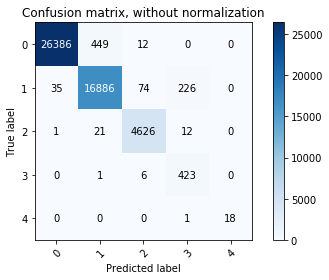

In [69]:
plot_confusion_matrix(test_y, nb_clf.predict( test_X), classes=[0,1,2,3,4],
                      title='Confusion matrix, without normalization')

In [70]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

0.9829595135937532

In [71]:
print nb_clf.predict( test_X ) 

[0 0 1 ... 1 0 0]


In [72]:
y=pd.DataFrame(nb_clf.predict( test_X ) )

In [73]:
y.head(10)

,0
0,0
1,0
2,1
3,1
4,1
5,3
6,0
7,1
8,0
9,0


In [98]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=5, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [45,50,55,60],
              'svc__gamma': [0.005,0.008,0.01]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(train_X, train_y)
print(grid.best_params_)

C:\Users\lenovo1\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 59min 57s
{'svc__gamma': 0.01, 'svc__C': 60}


In [100]:
model = grid.best_estimator_
yfit = model.predict(test_X)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit,
                            target_names=['0', '1','2','3','4']))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     26847
           1       0.94      0.93      0.93     17221
           2       0.51      0.85      0.64      4660
           3       0.23      0.89      0.36       430
           4       0.02      0.84      0.04        19

   micro avg       0.85      0.85      0.85     49177
   macro avg       0.54      0.86      0.57     49177
weighted avg       0.91      0.85      0.87     49177



In [103]:
metrics.accuracy_score( test_y, model.predict(test_X) )

0.8493604733920329

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
RandomForestClassifier?

In [110]:
param_grid = {'criterion':['gini','entropy']}

In [111]:
radm_clf= GridSearchCV(RandomForestClassifier(n_estimators=20,min_samples_split=1000), param_grid, cv = 10)
radm_clf.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
radm_clf.best_params_

{'criterion': 'gini'}

In [114]:
radm_clf.best_score_

0.9991459364197113

In [117]:
radm_clf = RandomForestClassifier(n_estimators=100,min_samples_split=1000)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
radm_test_pred  = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [126]:
radm_test_pred .sample( n = 30)

,actual,predicted
64887,0,0
119063,1,1
118148,0,0
98351,0,0
67546,1,1
64749,0,0
115027,1,1
41955,0,0
42515,0,0
107543,1,1


In [119]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9991052727901255

In [120]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

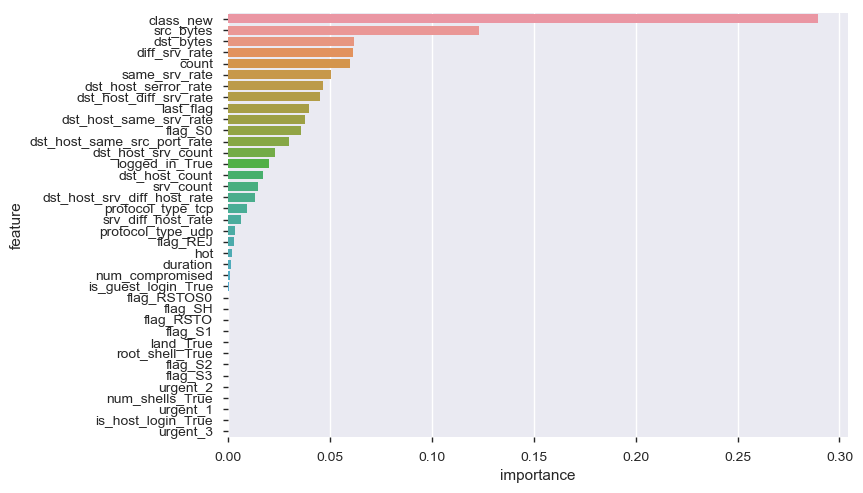

In [121]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

<b> Note: </b>
As per the model, the most important features which influence in predicting type of network attack ,in descending order, are

- src_bytes
- dst_bytes
- diff_srv_rate
- count
- same_srv_rate
- dst_host_serror_rate
- dst_host_diff_srv_rate
- last_flag
- dst_host_same_srv_rate
- flag_s0


### Predicting on data_test

In [99]:
data_test.drop(columns=['srv_serror_rate','srv_rerror_rate','rerror_rate','dst_host_srv_serror_rate','flag_SF','serror_rate','dst_host_srv_rerror_rate','flag_RSTR','dst_host_rerror_rate'],axis=1,inplace=True)

In [100]:
data_test_Y=data_test['class_new']
x_columns=data_test.columns
data_test_X=data_test[x_columns]

In [141]:
radm_Test_pred  = pd.DataFrame( { 'actual': data_test_Y,
                            'predicted': radm_clf.predict(data_test_X ) } )

In [142]:
metrics.accuracy_score( radm_Test_pred.actual, radm_Test_pred.predicted )

0.9342029114543917

In [143]:
radm_Test_pred.sample(20)

,actual,predicted
2991,0,0
13390,1,1
7127,1,1
6390,1,1
15739,0,0
21650,0,0
4512,0,0
21809,0,0
6866,1,1
14760,0,0


In [85]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [96]:
clf_tree = DecisionTreeClassifier( max_depth = 12, min_samples_split=1000,criterion='entropy')
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=1000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
y_pred_dt= pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X) } )

In [98]:
metrics.accuracy_score( y_pred_dt.actual, y_pred_dt.predicted )

0.9996136405230087

In [101]:
dt_Test_pred  = pd.DataFrame( { 'actual': data_test_Y,
                            'predicted': clf_tree.predict(data_test_X ) } )

In [102]:
metrics.accuracy_score(dt_Test_pred.actual, dt_Test_pred.predicted )

0.9970173173663357

In [103]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [104]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [106]:
from sklearn.model_selection import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [107]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 61.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [108]:
gscv_ada.best_params_

{'learning_rate': 0.001, 'n_estimators': 800}

In [109]:
clf_ada = gscv_ada.best_estimator_

In [110]:
gscv_ada.best_score_

0.999552633362706

In [112]:
ad=AdaBoostClassifier( learning_rate =0.001, n_estimators=800)
ad.fit(train_X, train_y, )

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.001, n_estimators=800, random_state=None)

In [113]:
y_pred_ad= pd.DataFrame( { 'actual':  test_y,
                            'predicted': ad.predict( test_X) } )

In [114]:
metrics.accuracy_score(y_pred_ad.actual,y_pred_ad.predicted )

0.9996136405230087

In [115]:
ad_Test_pred  = pd.DataFrame( { 'actual': data_test_Y,
                            'predicted': ad.predict(data_test_X ) } )

In [116]:
metrics.accuracy_score(ad_Test_pred.actual, ad_Test_pred.predicted )

0.9970173173663357

In [117]:
ad_Test_pred.sample(20)

,actual,predicted
11219,3,3
4588,2,2
3019,0,0
14797,1,1
18981,1,1
4565,0,0
16846,2,2
7298,1,1
18850,1,1
1016,1,1
